In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

Была взята готовая НС архетектуры SSD

- deploy.prototxt — файл описывающий слои нашей нейронной сети.
- caffemodel — веса, вычисленные во время тренировки модели.

In [2]:
protoFile = "deploy.prototxt.txt"
weightsFile = "res10_300x300_ssd_iter_140000_fp16.caffemodel"

Загрузка модели

In [3]:
model = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

imread сразу преобразует исходную картинку в массив Numpy

In [4]:
image = cv2.imread("img.jpg")

# Изменяем входное изображение
- Приводим к размеру, по которому обучалась НС (300х300)
- Делаем среднее вычитание, (104.0, 177.0, 123.0) это среднее значение RGB из набора данных. Ниже приведенно измененное изображение. 
Насколько я понял, это нужно для того, чтобы уровнять освященность изображенний из набора данных, дабы освещенность изображения не влияла на работу НС. 

In [7]:
height, width = image.shape[:2]
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), (104.0, 177.0, 123.0))
blob_print = blob

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 300, 300)
(300, 300, 3)


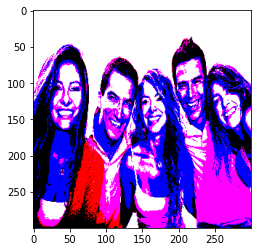

In [8]:
blob_print = blob_print[0]
print(blob_print.shape)
blob_print = np.swapaxes(blob_print, 0, 2)
blob_print = np.swapaxes(blob_print, 0, 1)
print(blob_print.shape)
plt.imshow(blob_print)
plt.show()

In [9]:
# Подаем на вход НС
model.setInput(blob)
# Выход НС
output = model.forward()

output = output[0, 0]
print(output.shape)

(200, 7)


In [10]:
for i in range(0, output.shape[0]):
    # Вероятность обнаружения лица
    confidence = output[i, 2]
    # Если вероятность больше 50%, то нарисовать прямоугольник
    if confidence > 0.5:
        # Масштаб координат прямоугольников увеличиваетс до до масштаба исходного изображения
        box = output[i, 3:7] * np.array([width, height, width, height])
        start_x, start_y, end_x, end_y = box.astype(np.int)
        # Рисование прямоугольников
        cv2.rectangle(image, (start_x, start_y), (end_x, end_y), color=(255, 0, 0), thickness=2)
        # Добавление текста
        cv2.putText(image, f"{confidence*100:.2f}%", (start_x, start_y-5), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 0, 0), 2)

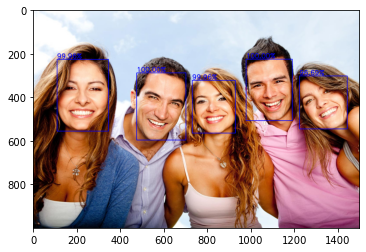

In [11]:
# Преобразование в RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()